<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/Microsoft19thCenturyBooks/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports

import pandas as pd
# import json, os, shutil, codecs
import zipfile
import io
import urllib
import json
import altair as alt

### Let us first have a look at metadata inside a **CSV / TSV file (small one)**:

In [0]:
# RUN this CELL if using BINDER or a LOCAL Jupyter Notebooks SERVER (see bellow for Google Colab)
# read metadata file #1 -- small TSV file

filename = "data/Microsoft-Books.zip"
df = pd.read_csv(filename, delimiter="\t", compression ="zip")

In [0]:
# RUN this CELL if using Google COLAB
# read metadata file #1 -- small TSV file

filename = "https://github.com/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/raw/master/Microsoft19thCenturyBooks/data/Microsoft-Books.zip"
df = pd.read_csv(filename, delimiter="\t", compression ="zip")

In [5]:
# number of records inside this file / dataframe

df.size

937004

In [6]:
# 1st 3 records

df.head(3)

Physical Record ID  BL record ID  ... Languages Contents
0           4031040.0      14940086  ...    Polish      NaN
1           4031043.0      15178564  ...    Polish      NaN
2           4030703.0      14841678  ...    German      NaN

[3 rows x 19 columns]

In [7]:
df["Content type"].value_counts()

Text                         49314
Cartographic image ; Text        2
Name: Content type, dtype: int64

In [8]:
# Tops of Publication Dates

df["Date of publication (standardised)"].value_counts()

1897         1491
1896         1423
1895         1269
1893         1214
1890         1178
             ... 
1834-           1
1888-1890       1
2971            1
1872-1878       1
1835-1836       1
Name: Date of publication (standardised), Length: 418, dtype: int64

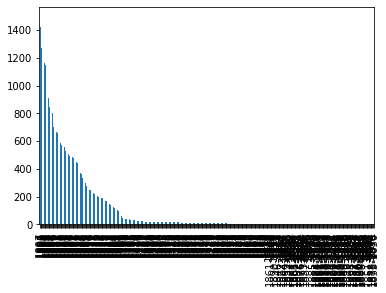

In [9]:
# ploting them with the default sort of the value counts -- not the best
df["Date of publication (standardised)"].value_counts().plot(kind='bar')

In [10]:
# another way to calculate the count of the number of records per date of publication -- this time sorting by value of the field, instead of the default counts value   

CountPerYear = pd.value_counts(df["Date of publication (standardised)"].values, sort=False).sort_index()
# equivalent to > CountPerYear = df["Date of publication (standardised)"].value_counts().sort_index()

CountPerYear

1180    1
1510    1
1528    1
1540    1
1556    1
       ..
1931    1
1938    1
1946    5
1949    1
2971    1
Length: 418, dtype: int64

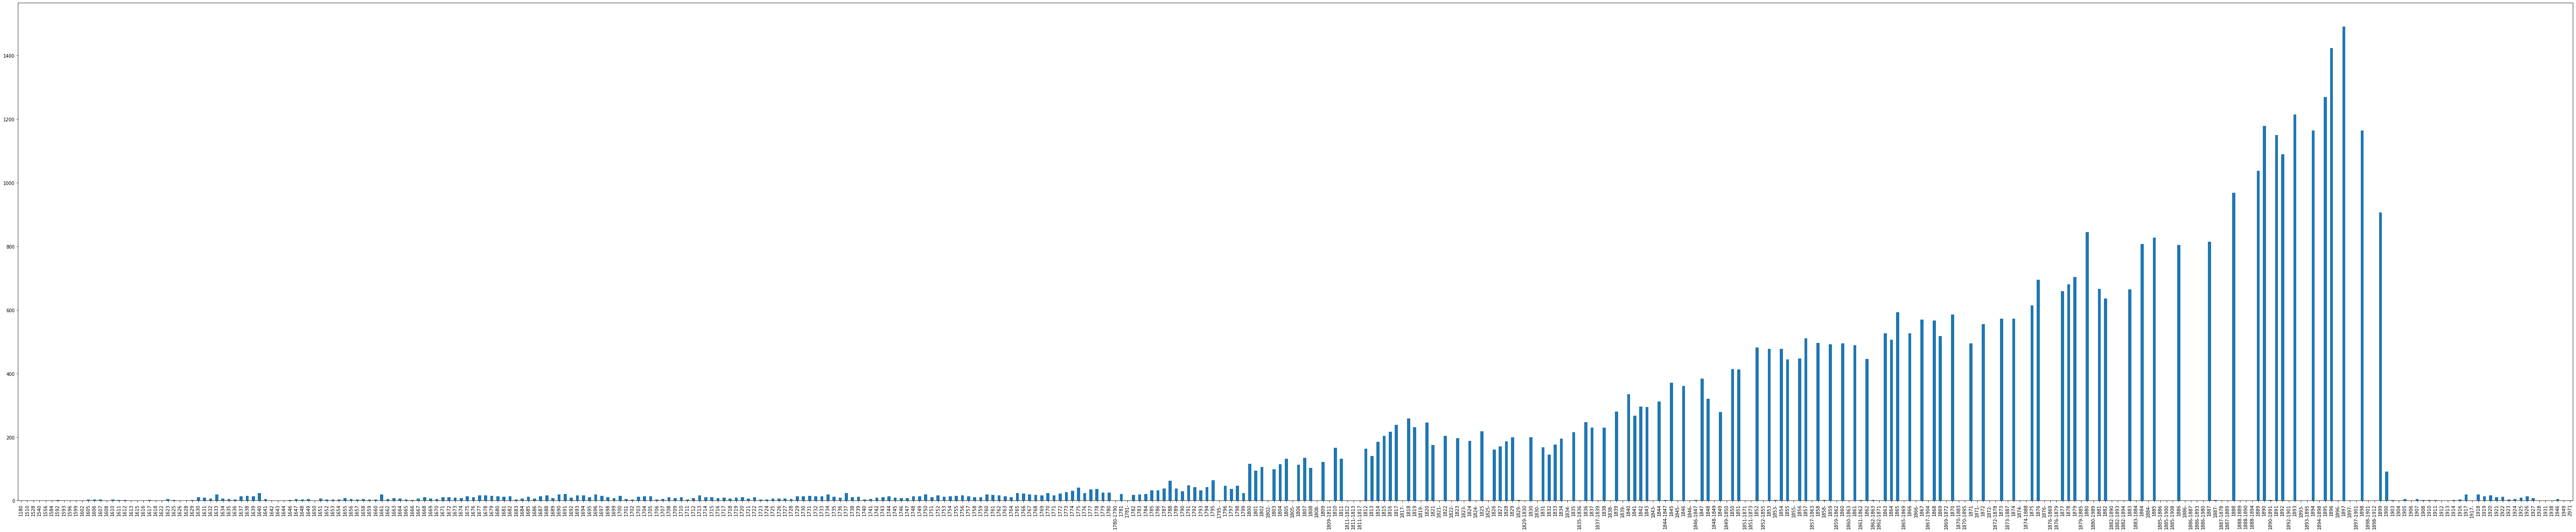

In [11]:
# ploting it now it allows to have a better view of the evolution over the years -- peak value: year 1897 = 1491 entries

CountPerYear.plot.bar(figsize=(100,20))

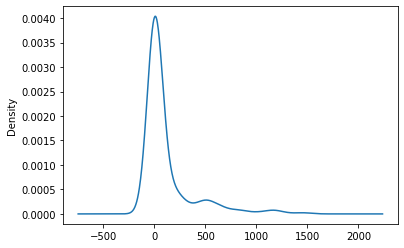

In [12]:
# Density plot (?)

CountPerYear.plot.kde()

In [14]:
# top of Genre

df["Genre"].value_counts()

Periodical                                               38
Directory                                                18
Fiction                                                  14
Source                                                    8
Biography                                                 7
Poetry or verse                                           5
Dictionary                                                5
Pictorial work                                            4
Review                                                    4
Early works to 1800                                       3
Libretto                                                  3
Guidebook                                                 3
Statistics                                                3
Atlas                                                     2
Handbook or manual                                        2
Travel                                                    2
Gazetteer                               

In [15]:
# top of Literary form

df["Literary form"].value_counts()

Not fiction      298
Fiction          177
Poetry            27
Dramas            15
Novels            11
Short stories      5
Letters            1
Mixed forms        1
Name: Literary form, dtype: int64


### Let us check another metadata set inside a **JSON file (big one)**:


In [0]:
# RUN this CELL if using BINDER or a LOCAL Jupyter Notebooks SERVER (see bellow for Google Colab)
# read metadata file #2 (big JSON file -- book_data.json (52MB) inside book_data.zip (13MB))

filename = "data/book_data.zip"

# unzips the files inside book_data.zip
z = zipfile.ZipFile(filename)

In [0]:
# RUN this CELL if using Google COLAB
# read metadata file #2 (big JSON file -- book_data.json (52MB) inside book_data.zip (13MB))

zip_file = "https://github.com/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/raw/master/Microsoft19thCenturyBooks/data/book_data.zip"

# OR test loading it from data.bl.uk
# zip_file = "https://data.bl.uk/digbks/book_data.zip"

access_url = urllib.request.urlopen(zip_file)

# unzips the files inside book_data.zip
z = zipfile.ZipFile(io.BytesIO(access_url.read()))

In [0]:
# loads JSON from the first (only) file inside into a list 
meta = json.loads(z.read(z.infolist()[0]).decode('utf-8'))


In [18]:
# number of records inside this list

len(meta)

49509

In [19]:
# checking a ramdom record (#342)

meta[342]

{'authors': {'creator': ['AICKIN, Robert.']},
 'corporate': {},
 'date': '1890',
 'datefield': '1890',
 'edition': '',
 'flickr_url_to_book_images': 'http://www.flickr.com/photos/britishlibrary/tags/sysnum000033323',
 'identifier': '000033323',
 'imgs': {'0': {'000002': ['11294298083'],
   '000004': ['11295058696'],
   '000007': ['11116640094'],
   '000008': ['11202909965'],
   '000009': ['11206793353'],
   '000017': ['11115558733'],
   '000019': ['11115524535', '11115435123'],
   '000021': ['11114256935'],
   '000023': ['11114456165', '11117044754'],
   '000024': ['11114370245'],
   '000025': ['11115776723', '11116448223'],
   '000027': ['11294781816'],
   '000028': ['11117548493'],
   '000029': ['11116646896'],
   '000030': ['11114922533'],
   '000031': ['11114922566'],
   '000032': ['11114994984'],
   '000035': ['11206448996'],
   '000038': ['11204986556'],
   '000039': ['11204002115'],
   '000042': ['11116548993'],
   '000044': ['11296031935'],
   '000046': ['11206637743'],
   '000

In [20]:
# By Andrew Jackson (UKWA / BL):

years = []
pages = []
volumes = []
titles = []
publishers = []
place = []
url = []
shelfmarks = []
no_date = []
no_pages = []

# Loop over the books:
for book in meta:
    # Get the year
    date = book['date']
    if date == '':
        no_date.append(book)
        continue
    # Get the volumes as the number of image groups:
    vols = book.get('imgs',[])
    # Loop though the image groups and count the images
    p = 0
    for v in vols:
        p += len(vols[v])
    # Skip ones with no pages:
    if p == 0:
        no_pages.append(book)
        continue
    # This is a 'good one' so record it:
    years.append(int(date))
    volumes.append(len(vols))
    pages.append(p)
    # and titles:
    title = book.get('title','')
    title = ''.join(title)[:100]
    titles.append(title)
    # publisher
    publishers.append(book.get('publisher', ""))
    # place
    place.append(book.get('place',''))
    # url
    url.append(' '.join(list(book.get('pdf',{}).values())))
    shelfmarks.append(', '.join(book['shelfmarks']))

source = pd.DataFrame({
    'year': years,
    'pages': pages,
    'volumes': volumes,
    'title': titles,
    'publisher': publishers,
    'place': place,
    'ids': url,
    'shelfmarks': shelfmarks
})
source

year  ...                                         shelfmarks
0      1888  ...             British Library HMNTS 10347.cc.13.(4.)
1      1879  ...                  British Library HMNTS 12641.b.30.
2      1868  ...                  British Library HMNTS 12626.cc.2.
3      1859  ...                  British Library HMNTS 10126.e.11.
4      1854  ...                British Library HMNTS 10369.bbb.16.
...     ...  ...                                                ...
31053  1894  ...  British Library HMNTS 010055.e.16., British Li...
31054  1898  ...  British Library HMNTS 10056.g.25., British Lib...
31055  1871  ...  British Library HMNTS 11651.g.6., British Libr...
31056  1820  ...  British Library OC T 39943, British Library HM...
31057  1843  ...  British Library OC T 39938, British Library OC...

[31058 rows x 8 columns]

In [21]:
# By Andrew Jackson (UKWA / BL):

alt.data_transformers.disable_max_rows()
#alt.renderers.enable('notebook')

# define selection
click = alt.selection_multi(encodings=['color'])

chart = alt.Chart(source).mark_point(
    filled=True
).encode(
    alt.X('year:Q',
        scale=alt.Scale(zero=False)
    ),
    y='pages:Q',
    size='volumes:N',
    color='volumes:N',
#    href='url:N',
    tooltip=['title:N', 'volumes:N', 'pages:N','year:N', 'publisher:N', 'place:N', 'shelfmarks:N'],
    opacity=alt.value(0.5)
).transform_filter(
    click
).properties(
    width=800,
    height=600,
    selection=click,
)

chart.save("digbks-year-pages-volumes-scatter.html")

chart

alt.Chart(...)

### Let us check other metadata set inside **CSVs files (including a big one)**:

In [0]:
# read metadata file #3 (not MS Books, though -- big CSV file -- sherlock_flickr_tags.csv (27MB) + sherlocknet_tags_verbose.csv (207MB) inside sherlocknet_tags_csv.zip (44MB)), from BL Research Repository (British Library Labs: Projects | SherlockNet data, https://bl.iro.bl.uk/work/3205f8c5-f7dd-46fa-8bf4-9ac72f6fbb55)

zip_file = "https://s3.eu-west-2.amazonaws.com/importer.oar.bl.uk/bl/4ccd707f-eab9-4514-9fc3-17633274b17a"

access_url = urllib.request.urlopen(zip_file)

# unzips the files inside sherlocknet_tags_csv.zip
z = zipfile.ZipFile(io.BytesIO(access_url.read()))

In [0]:
# loads metadata from the sherlock_flickr_tags.csv (27MB) CSV file into a 1st dataframe
df1 = pd.read_csv(z.open('sherlock_flickr_tags.csv'))

In [24]:
# number of records inside this CSV / dataframe df1

df1.size

2910612

In [25]:
# 1st 3 records

df1.head(3)

flickr_id  image_idx         tag
0  10997113773          0       seals
1  10997057664          1  miniatures
2  10996985576          2  miniatures

In [26]:
# what are the most popular tags?

df1['tag'].value_counts()

people          190561
landscapes      118816
architecture    104517
decorations      97256
nature           80060
objects          71544
maps             58460
animals          56232
diagrams         56086
seals            55720
text             45153
miniatures       35799
Name: tag, dtype: int64

In [0]:
# loads metadata from the sherlocknet_tags_verbose.csv (207MB) CSV file into a 2nd dataframe

df2 = pd.read_csv(z.open('sherlocknet_tags_verbose.csv'))

In [28]:
# number of records inside this 2nd CSV / dataframe df2
df2.size

12612652

In [29]:
# 1st 3 records

df2.head(3)

image_idx    flickr_id         tag  ...   sysnum  date               filename
0          0  10997113773       seals  ...  2938347  1510  002938347_0_000009_1_
1          1  10997057664  miniatures  ...  2938347  1510  002938347_0_000006_1_
2          2  10996985576  miniatures  ...  2938347  1510  002938347_0_000009_2_

[3 rows x 13 columns]

In [30]:
# what are the most popular tags in this dataset? Compare if they match df1's

df2['tag'].value_counts()

people          190561
landscapes      118816
architecture    104517
decorations      97256
nature           80060
objects          71544
maps             58460
animals          56232
diagrams         56086
seals            55720
text             45153
miniatures       35799
Name: tag, dtype: int64

In [0]:
# How about reading a 11.4GiB .BZ2 file from data.bl.uk or from https://bl.iro.bl.uk/? Inside there's a tar file of 44GB -- and inside this the 65,277 JSON files)
# page level JSON text format from 45,455 digitised books (65,277 volumes) 

import bz2

# bz2_file = "https://data.bl.uk/digbks/dig19cbooksjsontext.bz2"
# bz2_file = "https://s3.eu-west-2.amazonaws.com/importer.oar.bl.uk/bl/0623cab5-58d7-4eba-b88b-bb32b86862d8"

access_url = urllib.request.urlopen(bz2_file)

# unzips the files inside
f = bz2.BZ2File(access_url, mode='r', buffering=None, compresslevel=9)

In [34]:
# check the bz2 file
f.peek()

b'json/\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000000755\x000142201\x000024421\x0000000000000\x0012216042104\x00012526\x00 5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ustar  \x00bosteen\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Domain Users\x00\x00

In [0]:
# Inside the bz2 there's a tar file of 44GB
tar_file = f.read()